<a href="https://colab.research.google.com/github/phat1505/Health-Classifition/blob/main/Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Đọc dữ liệu từ tệp CSV 'health_classification.csv' và hiển thị 5 dòng đầu tiên của DataFrame
df = pd.read_csv("/content/sample_data/health_classification.csv")
df.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


In [ ]:
# In ra thông tin tổng quan của DataFrame 'df', bao gồm thông tin về cột và kiểu dữ liệu
df.info()

In [ ]:
# Kiểm tra và in ra số lượng giá trị thiếu (NaN) trong từng cột của DataFrame 'df'
df.isna().sum()

In [ ]:
# Hiển thị các thống kê mô tả cơ bản (mean, min, max, etc.) cho các cột có giá trị số
df.describe()

In [ ]:
# Hiển thị hình dạng của DataFrame 'df', tức số dòng và số cột
df.shape

In [ ]:
# Hiển thị các thống kê mô tả cơ bản cho các cột không phải số (các cột chứa dữ liệu phân loại)
df.describe(exclude=['O'])

In [ ]:
# Vẽ histogram cho tất cả các cột trong DataFrame 'df' (chỉ có cột số)
df.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
# Xác định các cột phân loại để thực hiện visualizations và thống kê
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [ ]:
# Categorical Features
for i in cols:

    if i == 'Gender':

        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** Gender **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

    else:
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [ ]:
# Chọn cột 'Test Results'
col = 'Test Results'

# Nhóm theo cột đã chọn và tính tổng 'Billing Amount' cho mỗi giá trị trong cột
char_bar = df.groupby([col])['Billing Amount'].sum().reset_index()

# Sắp xếp giá trị theo thứ tự giảm dần
char_bar = char_bar.sort_values(by="Billing Amount", ascending=False)

# Lấy 10 giá trị hàng đầu
top = char_bar.head(10)

# Tạo biểu đồ cột sử dụng Plotly
fig = go.Figure(go.Bar(x=top[col], y=top['Billing Amount']))

# Tùy chỉnh bố cục và thông tin biểu đồ
fig.update_layout(
    title=f"Highest {col} According to Billing Amount",
    xaxis_title=col,
    yaxis_title="Billing Amount",
    plot_bgcolor='white',
    paper_bgcolor='blue',
    font=dict(color='orange')
)

# Hiển thị biểu đồ trong Colab
pio.show(fig, renderer="colab")


In [ ]:
# Select column of interest
col = 'Test Results'

# Group by the selected column and sum the 'Age'
char_bar = df.groupby([col])['Age'].sum().reset_index()

# Sort values in descending order
char_bar = char_bar.sort_values(by="Age", ascending=False)

# Take the top 10 rows
top = char_bar.head(10)

# Create a bar plot using Plotly
fig = go.Figure(go.Bar(x=top[col], y=top['Age']))

# Customize layout
fig.update_layout(
    title=f"Highest {col} According to Age",
    xaxis_title=col,
    yaxis_title="Age",
    plot_bgcolor='white',
    paper_bgcolor='blue',
    font=dict(color='orange')
)

# Display the figure in Colab
pio.show(fig, renderer="colab")

In [ ]:
# Tạo DataFrame mới bằng cách nhóm dữ liệu theo cặp cột 'Medical Condition' và 'Medication',
# tính tổng 'Billing Amount' trong mỗi nhóm và reset index
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

# Tạo biểu đồ cột thể hiện 'Billing Amount' theo 'Medical Condition' và 'Medication',
# sử dụng màu sắc khác nhau cho từng giá trị trong 'Medication'
plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
# Đặt tiêu đề biểu đồ
plt.title("Billing Amount according to Medical Condition and Medication")
# Đặt tên trục y
plt.ylabel("Billing Amount")
# Xoay nhãn trục x và đặt kích thước font
plt.xticks(rotation=45, fontsize=9)
# Hiển thị biểu đồ
plt.show()

In [ ]:
# Tạo DataFrame mới bằng cách nhóm dữ liệu theo cặp cột 'Medical Condition' và 'Test Results',
# tính tổng 'Billing Amount' trong mỗi nhóm và reset index
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

# Tạo biểu đồ cột thể hiện 'Billing Amount' theo 'Medical Condition' và 'Test Results',
# sử dụng màu sắc khác nhau cho từng giá trị trong 'Test Results'
plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
# Đặt tiêu đề biểu đồ
plt.title("Billing Amount according to Medical Condition and Test Results")
# Đặt tên trục y
plt.ylabel("Billing Amount")
# Xoay nhãn trục x và đặt kích thước font
plt.xticks(rotation=45, fontsize=9)
# Hiển thị biểu đồ
plt.show()

In [ ]:
# Tạo cột 'Days hospitalized' (số ngày nhập viện) bằng cách tính sự chênh lệch giữa 'Discharge Date' và 'Date of Admission'
df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days hospitalized'] = df['Days hospitalized'].astype(int)

df.head()

In [ ]:
# Tính trung bình số ngày nhập viện cho mỗi thuộc tính, loại bỏ 'Days hospitalized'
cols = df.columns

for i in cols:
    if i == 'Days hospitalized':
        # Bỏ qua cột 'Days hospitalized'
        continue

    # Tính trung bình số ngày nhập viện cho từng giá trị trong cột 'i'
    char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure(go.Bar(x=top[i], y=top['Days hospitalized']))

    fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                      xaxis_title=i,
                      yaxis_title="Days hospitalized",
                      plot_bgcolor='black',
                      paper_bgcolor='gray',
                      font=dict(color='white'))

    # Hiển thị biểu đồ bằng pio trong Colab
    pio.show(fig, renderer="colab")

In [ ]:
# Loại bỏ các hàng có giá trị thiếu
df.dropna(inplace=True)
columns = ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
               'Doctor', 'Hospital', 'Insurance Provider',
              'Billing Amount', 'Room Number', 'Admission Type', 'Medication']
X = df[columns]
y = df['Test Results']

# Chuyển đổi dữ liệu văn bản thành dữ liệu số bằng LabelEncoder
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Dự đoán kết quả
y_pred_nb = nb_model.predict(X_test)

# Đánh giá mô hình
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))

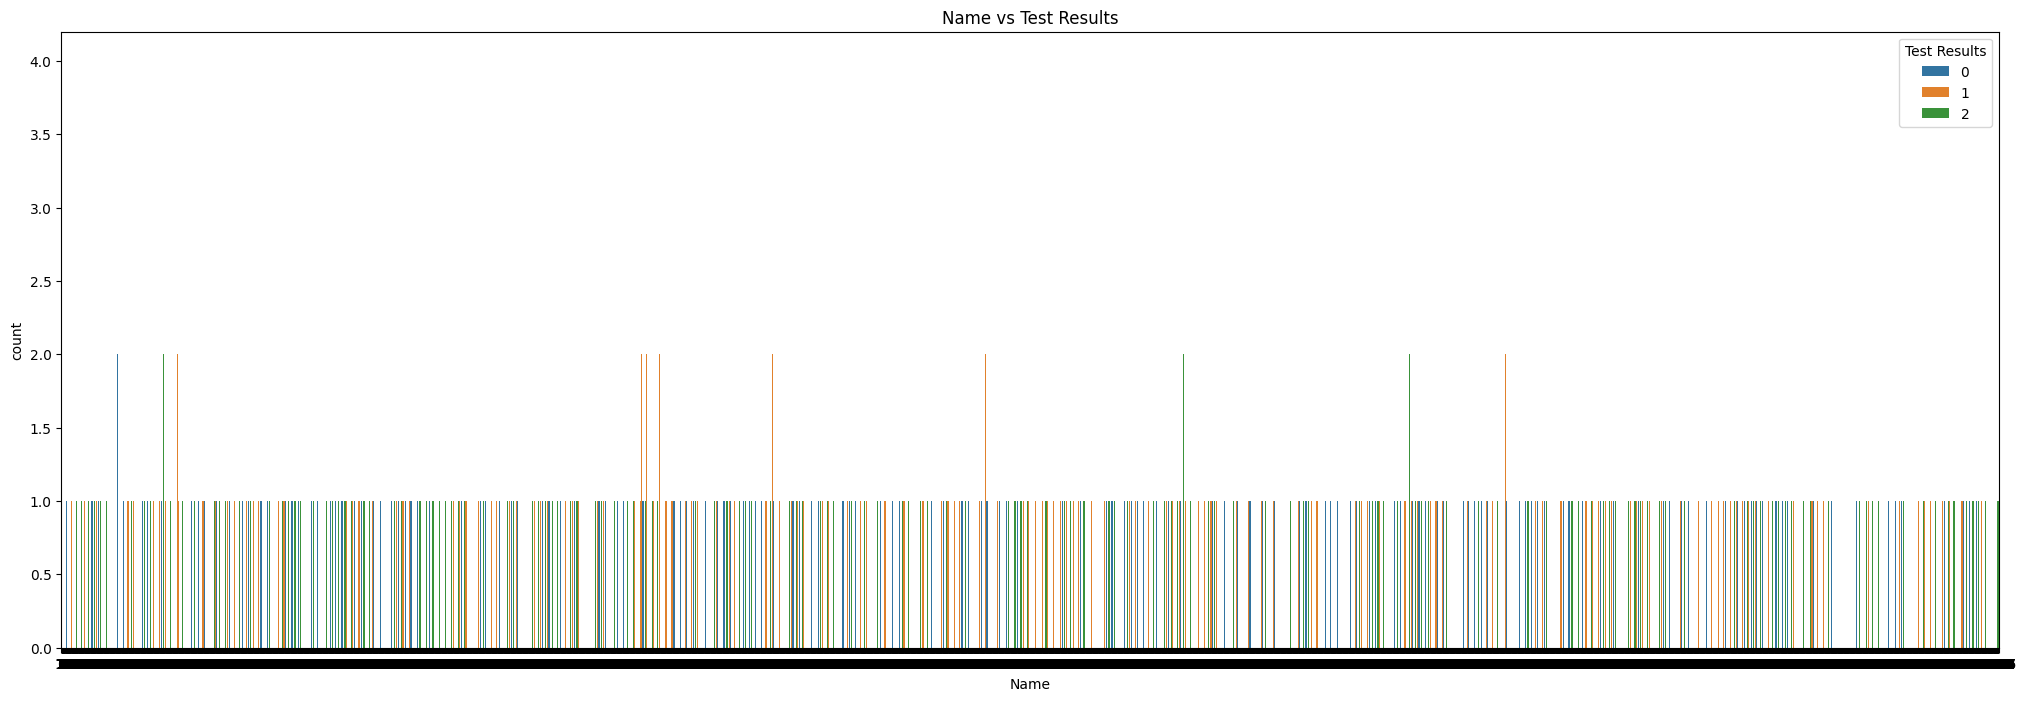

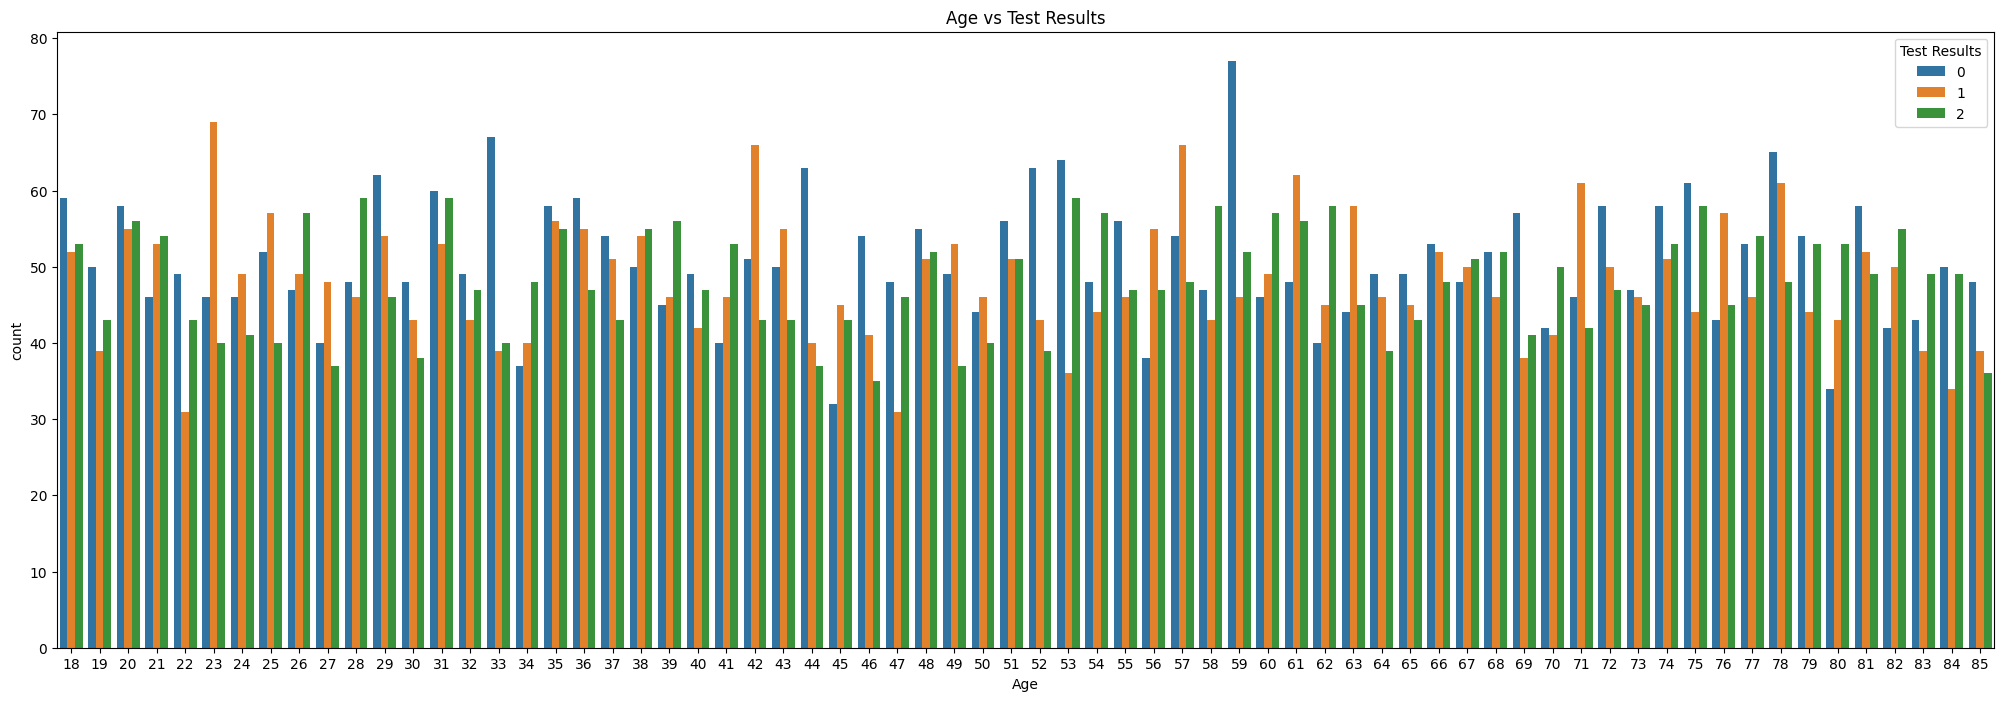

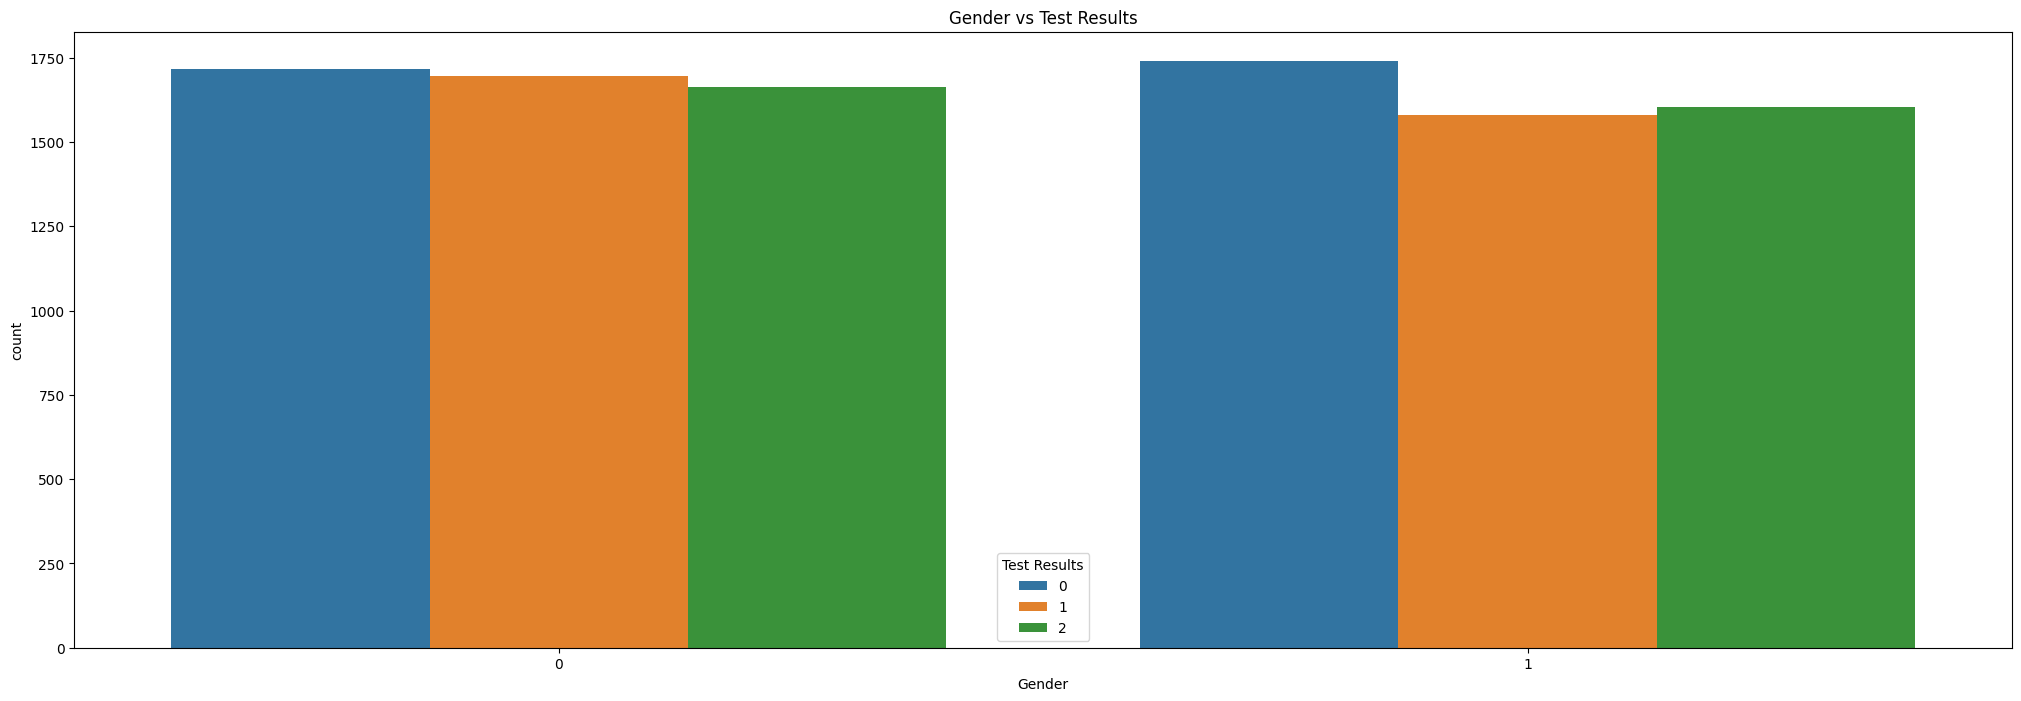

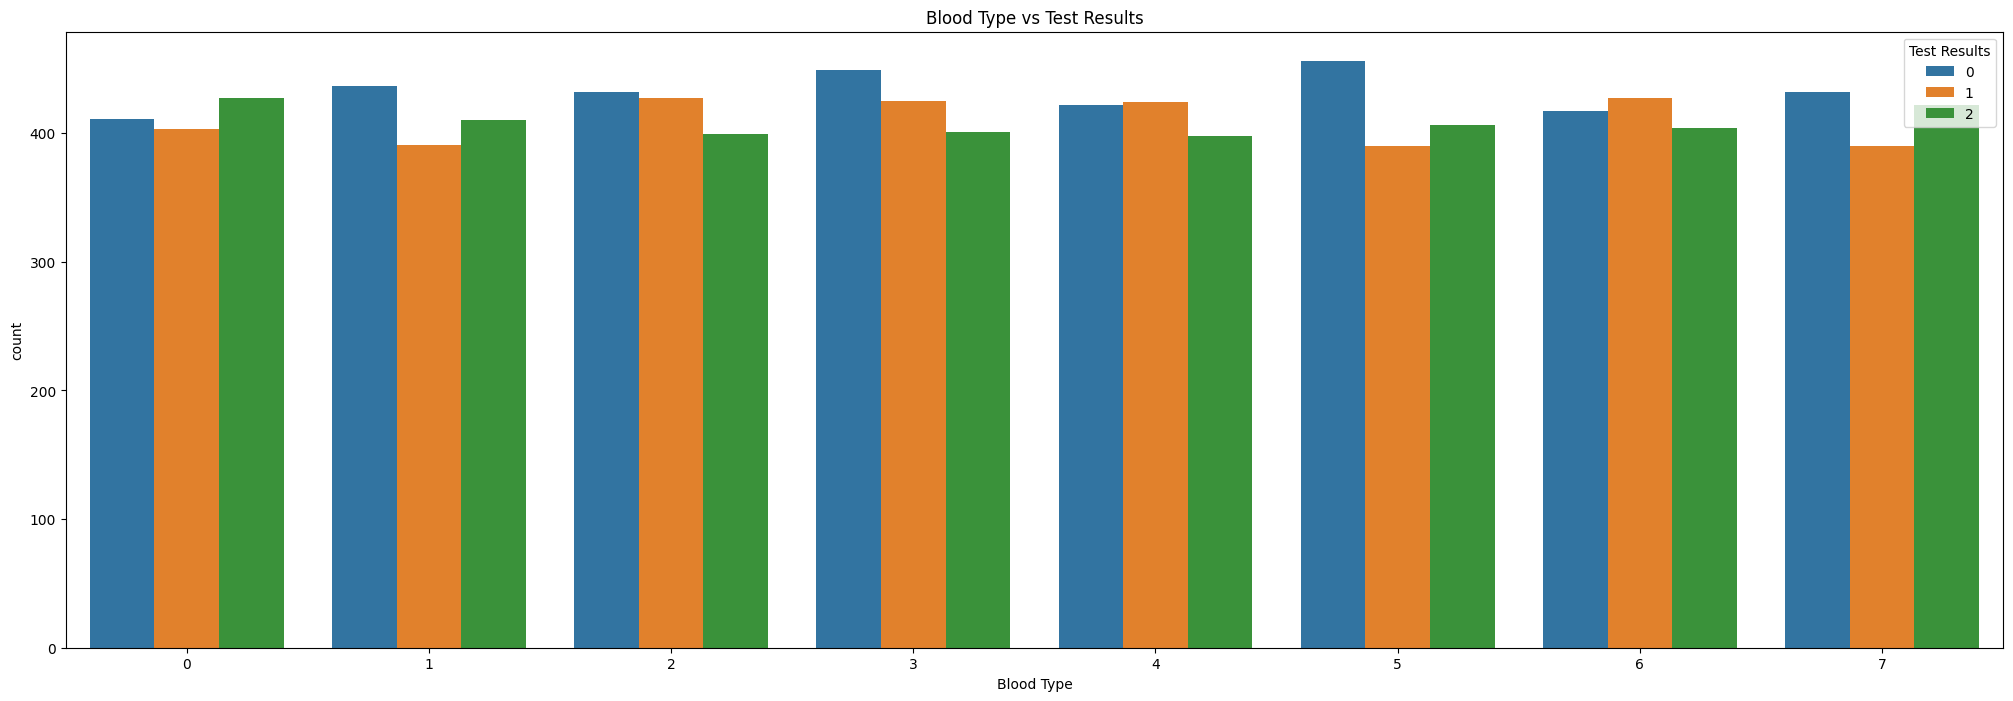

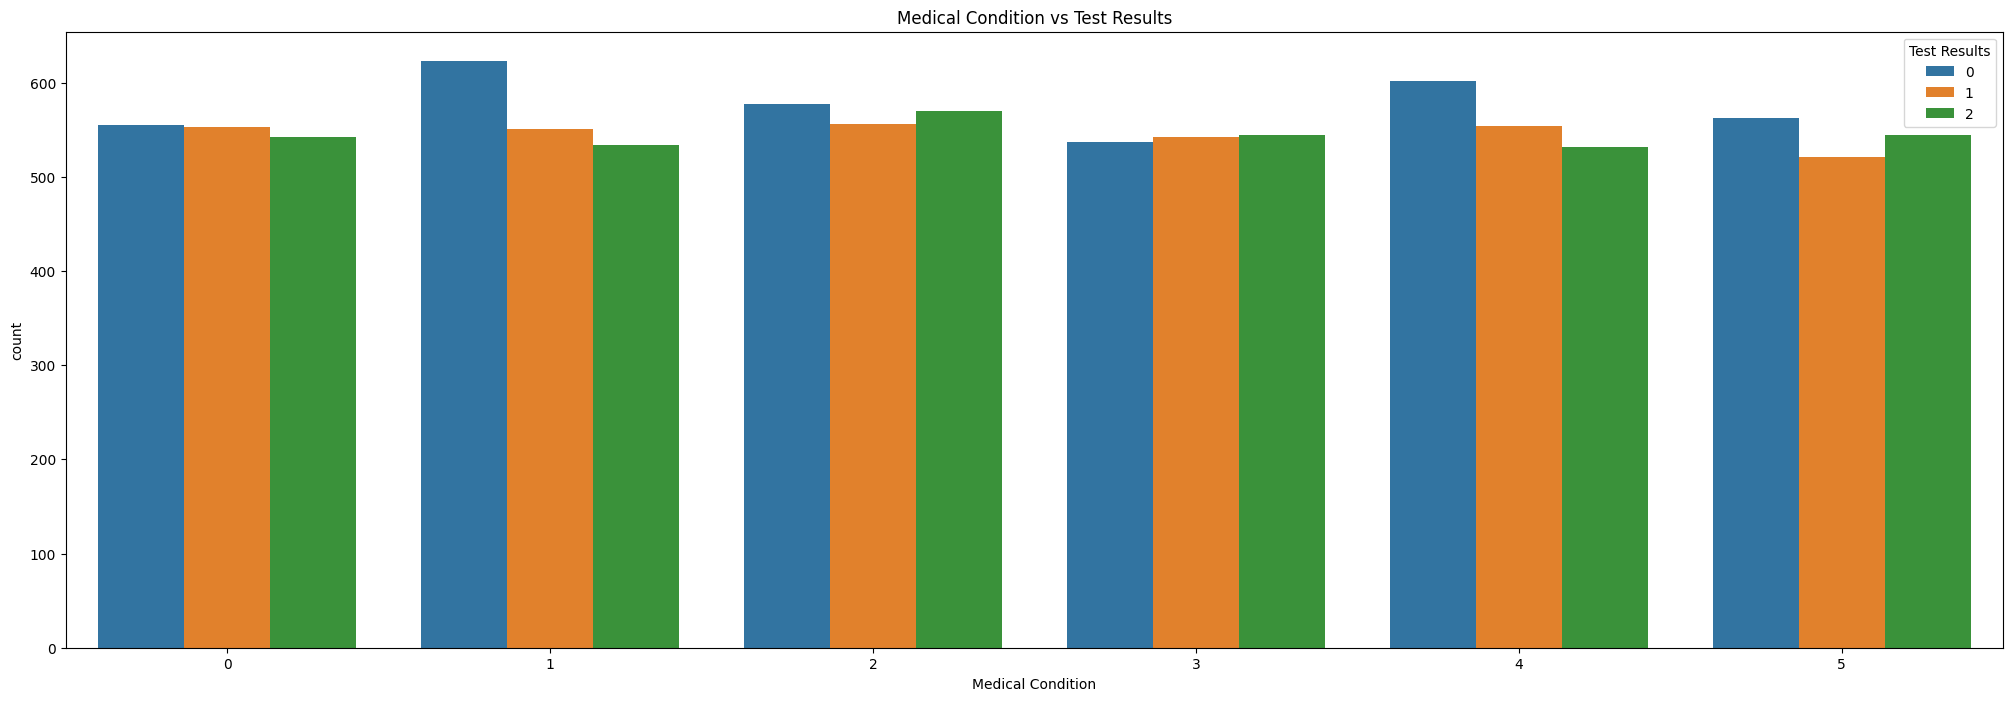

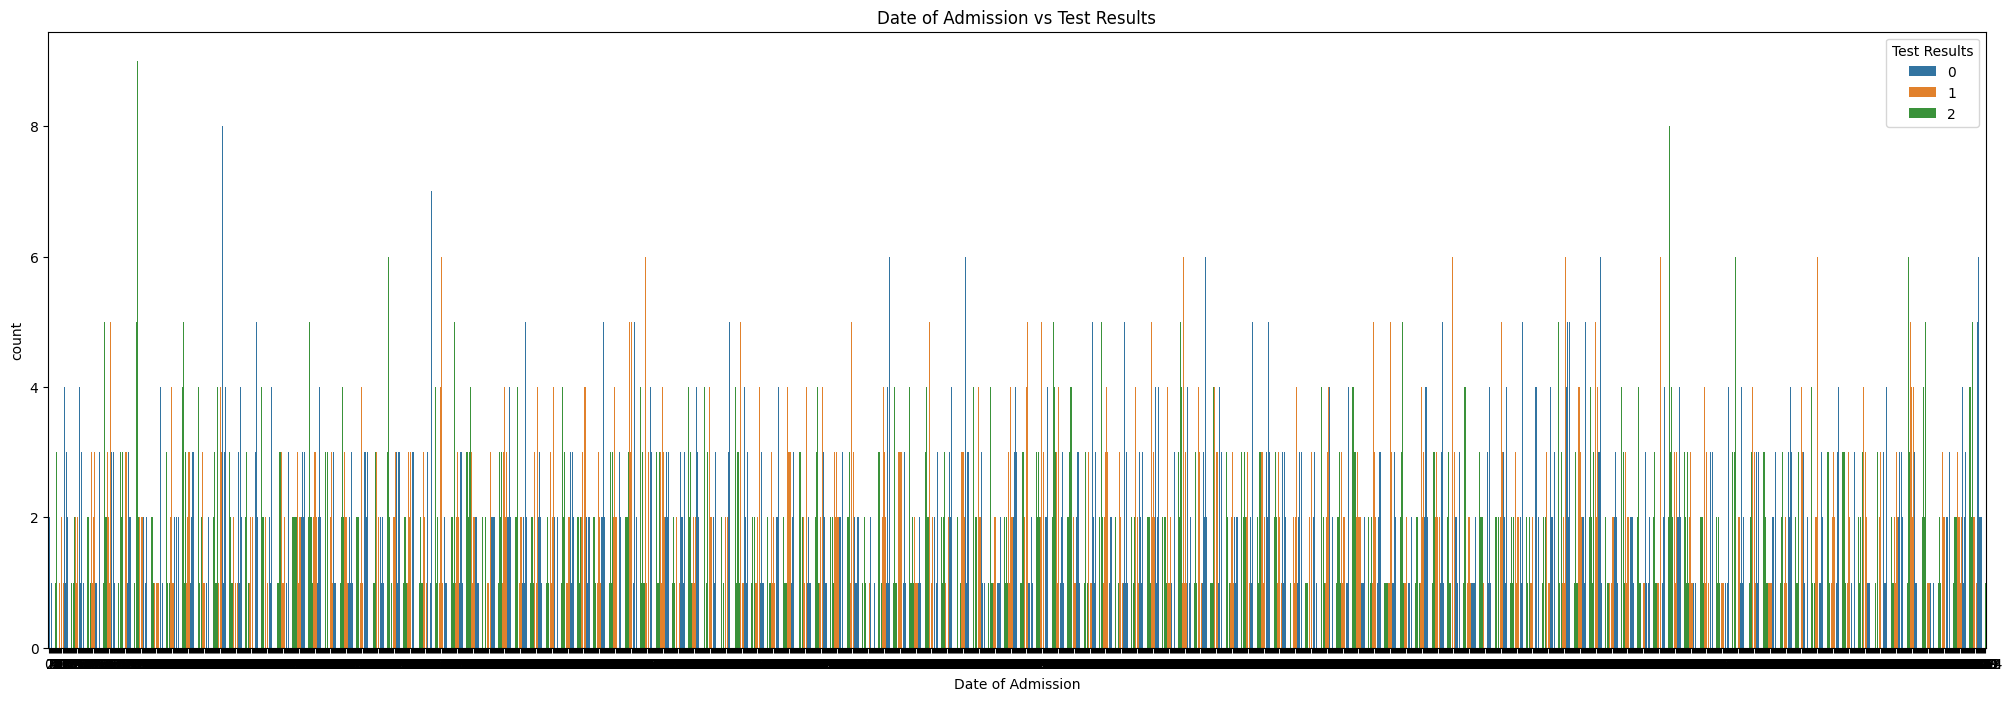

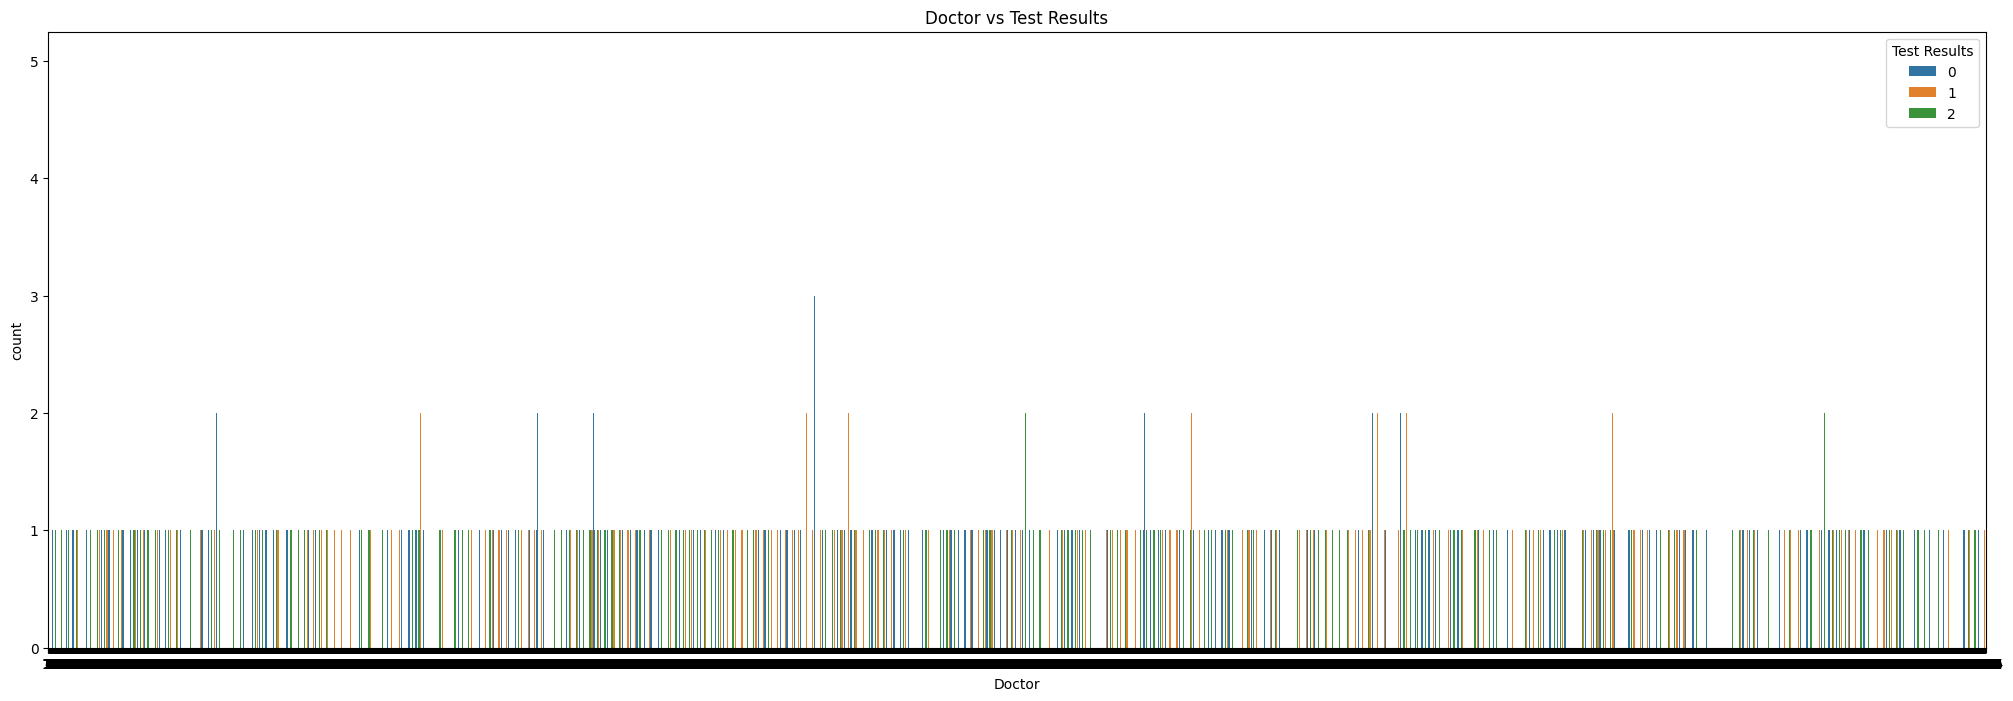

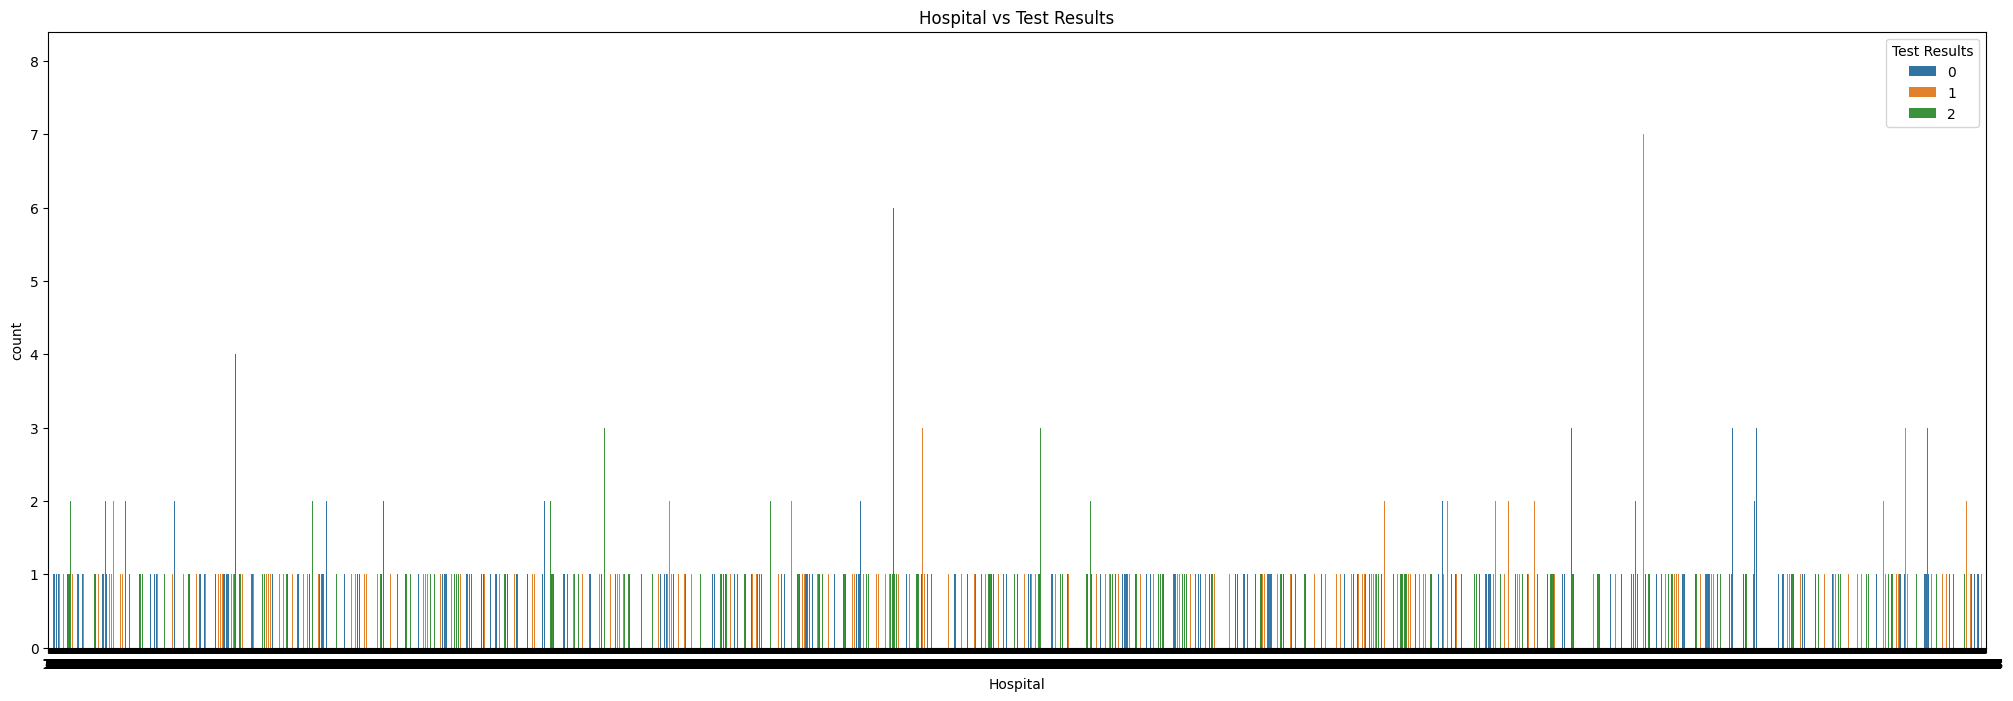

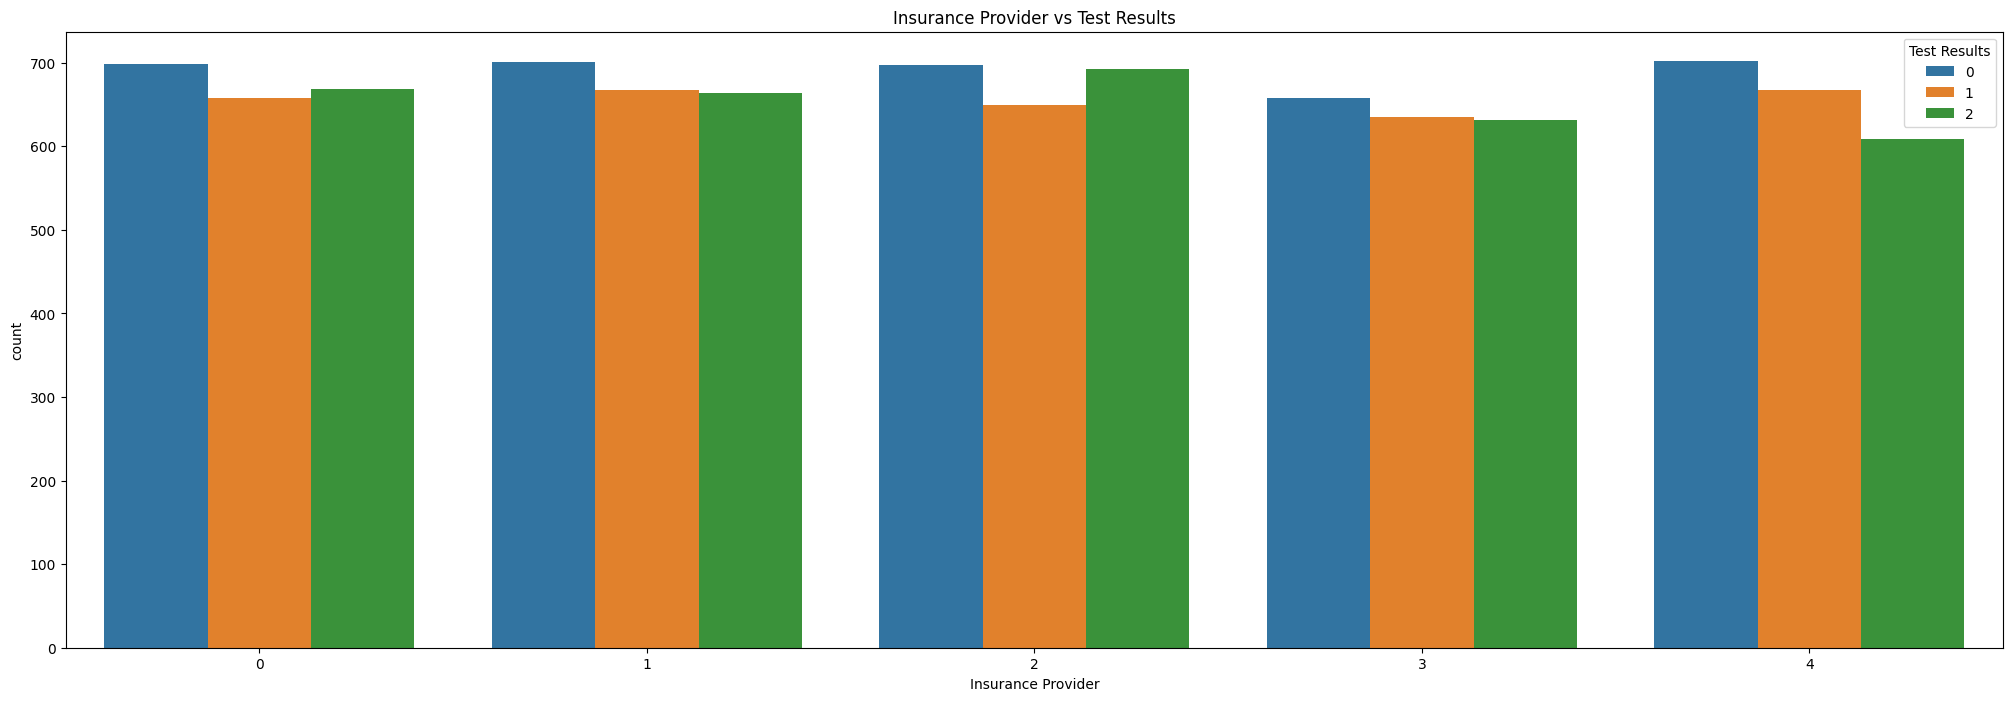

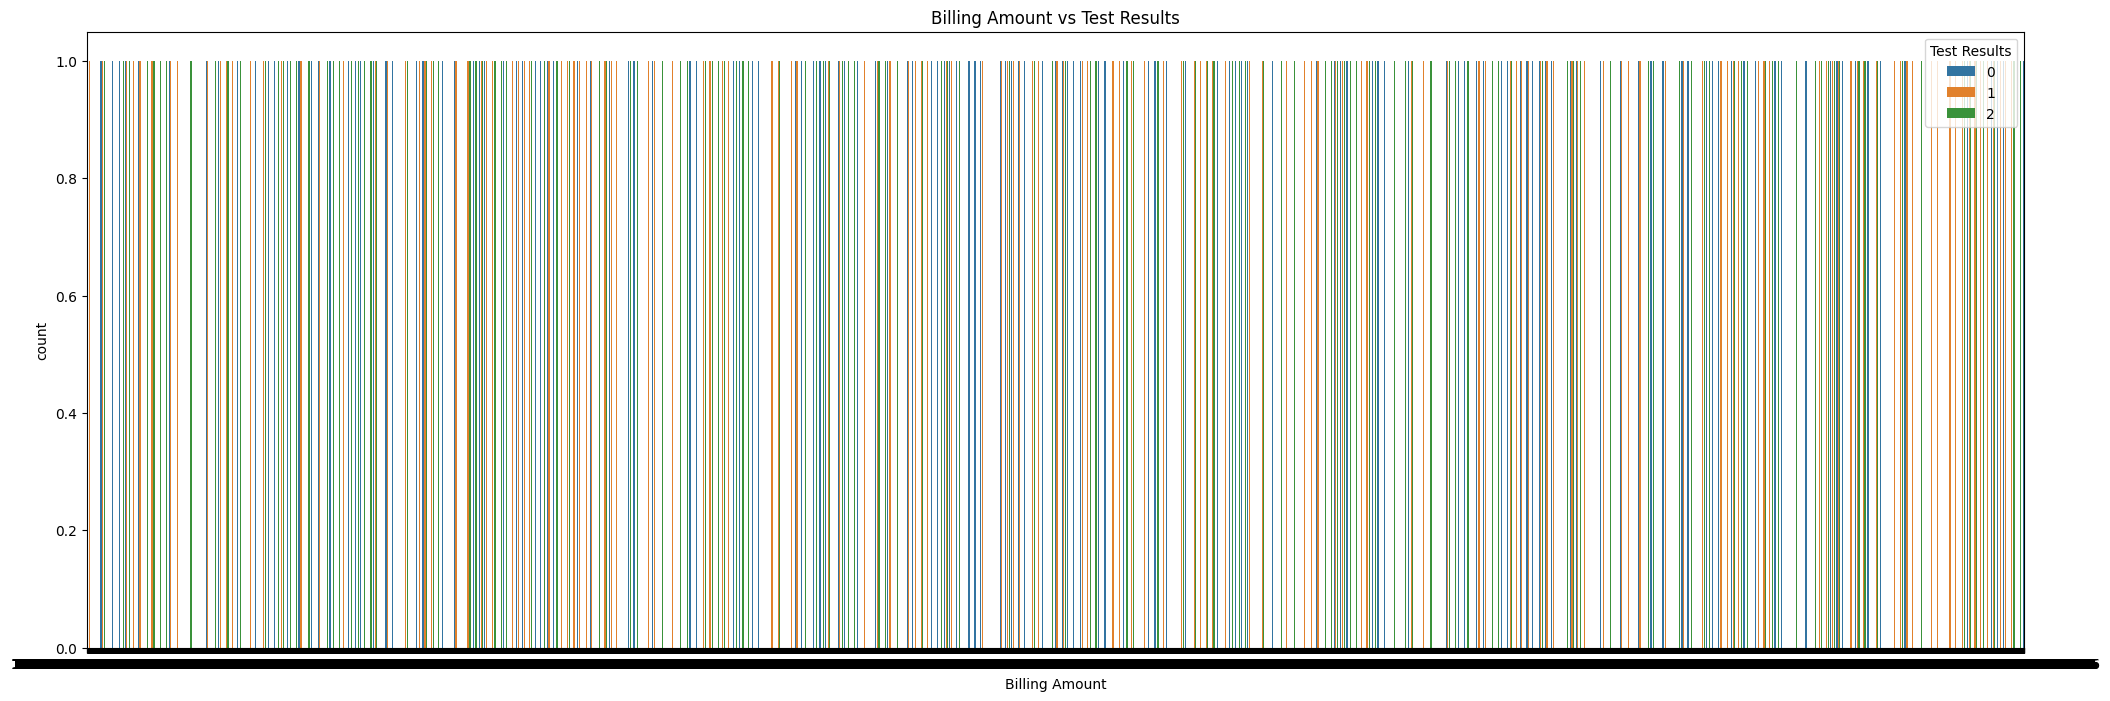

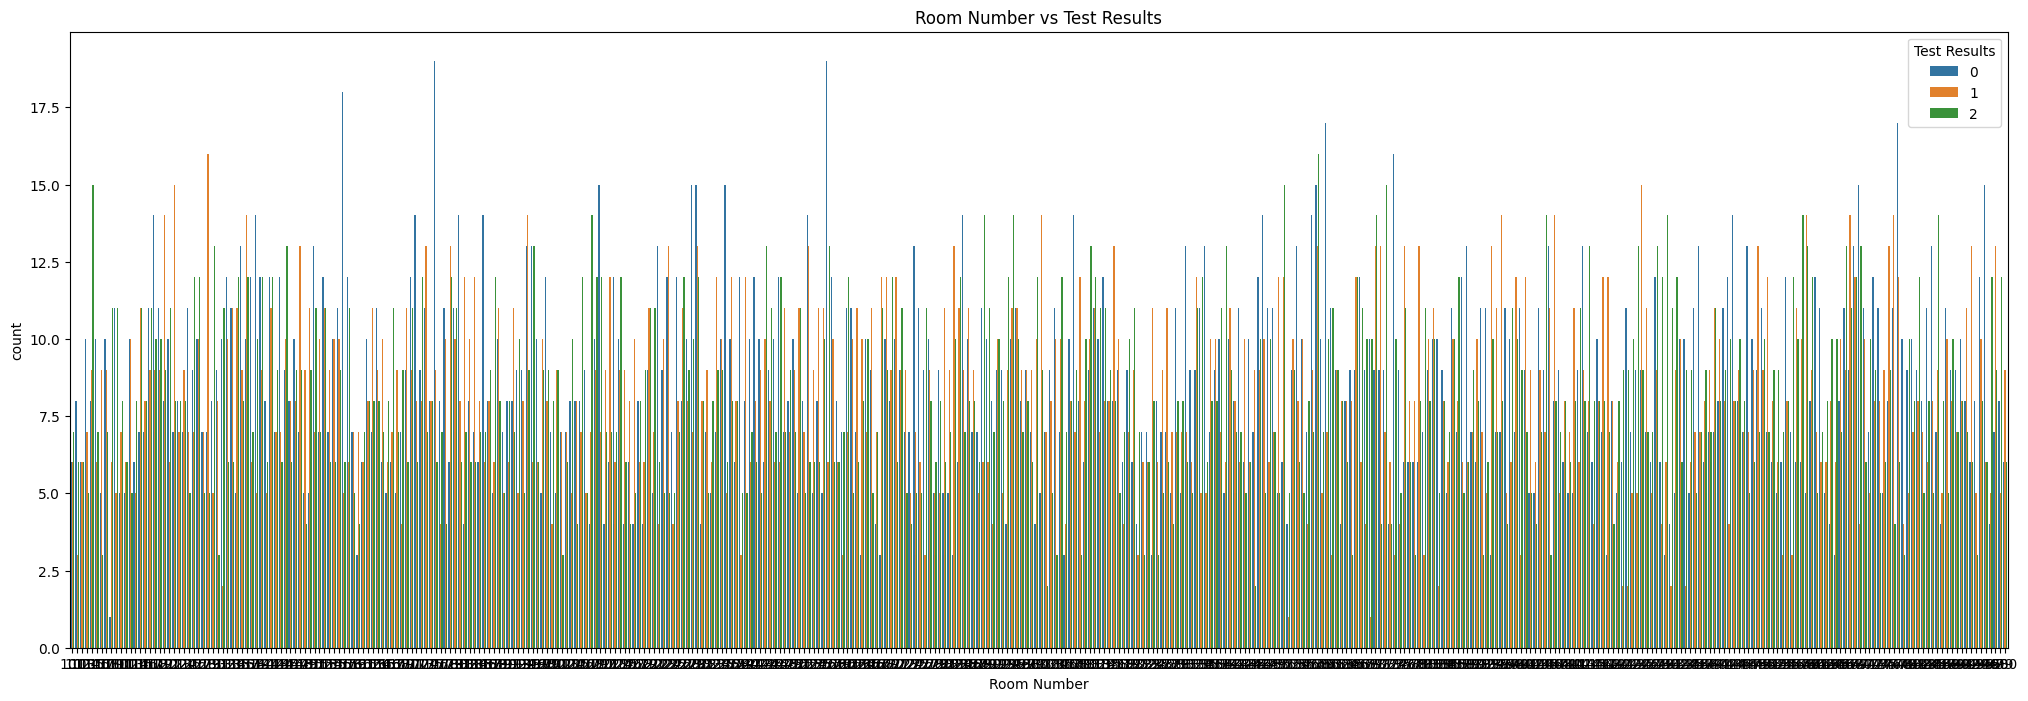

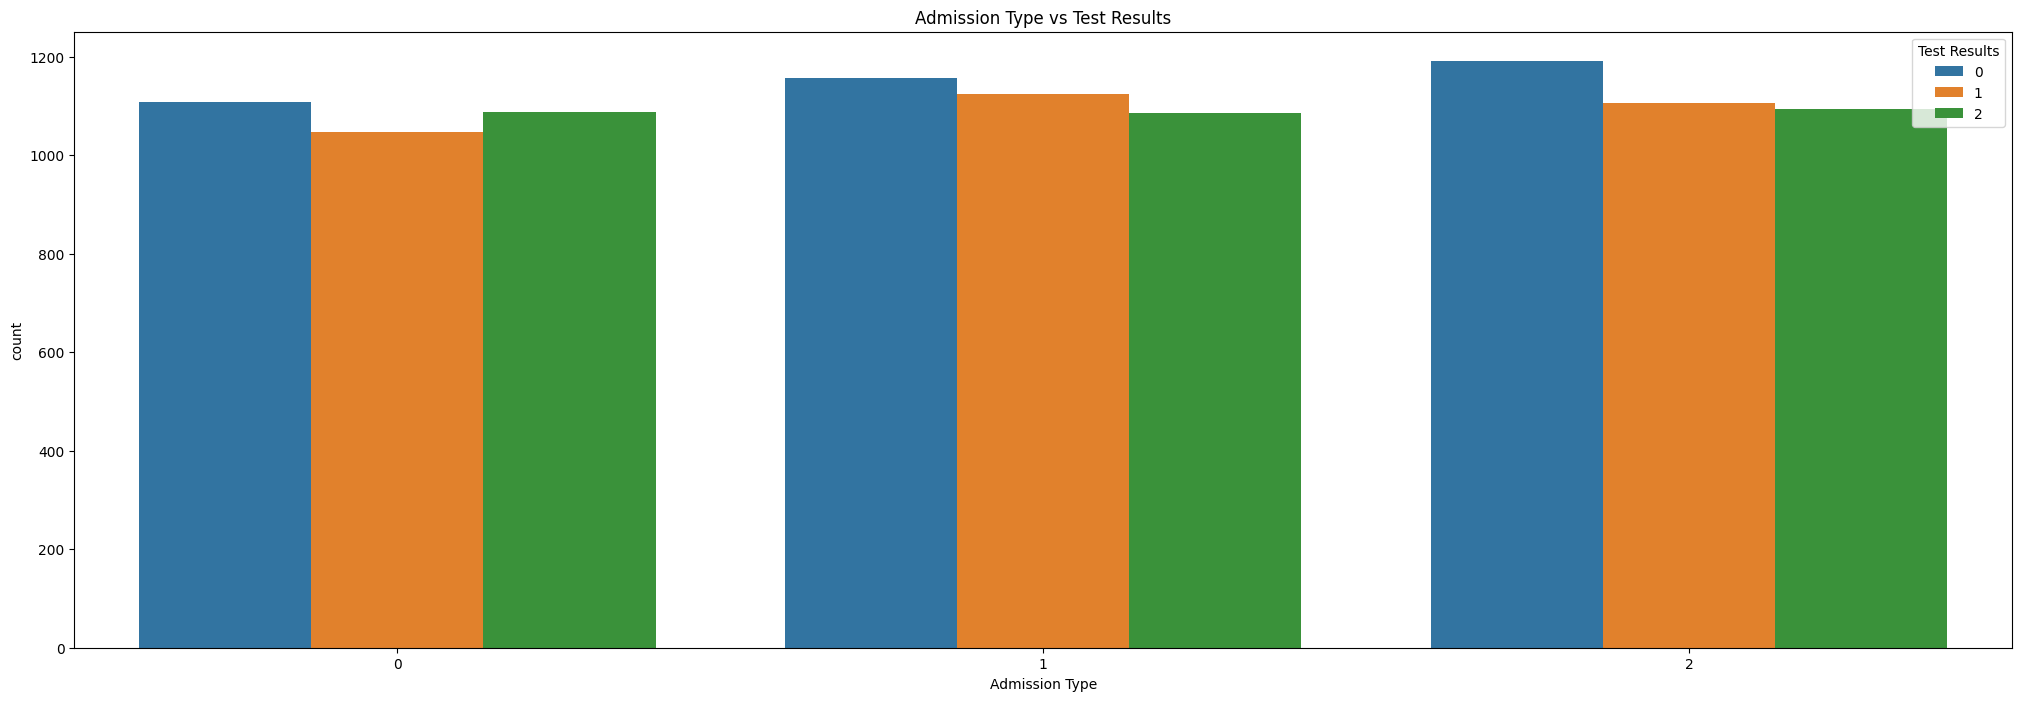

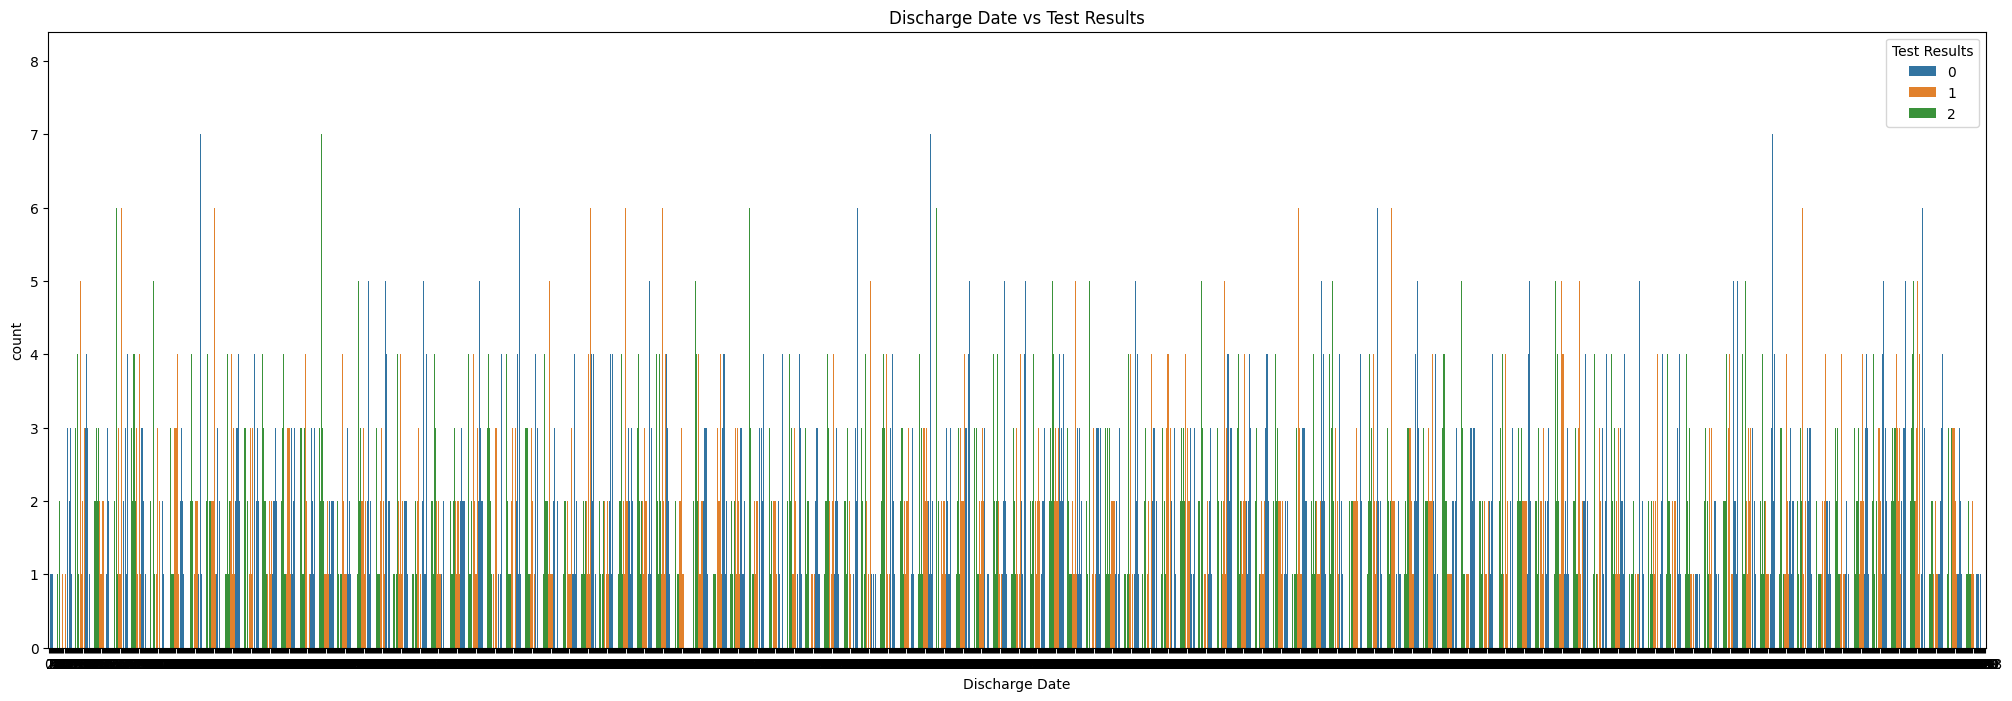

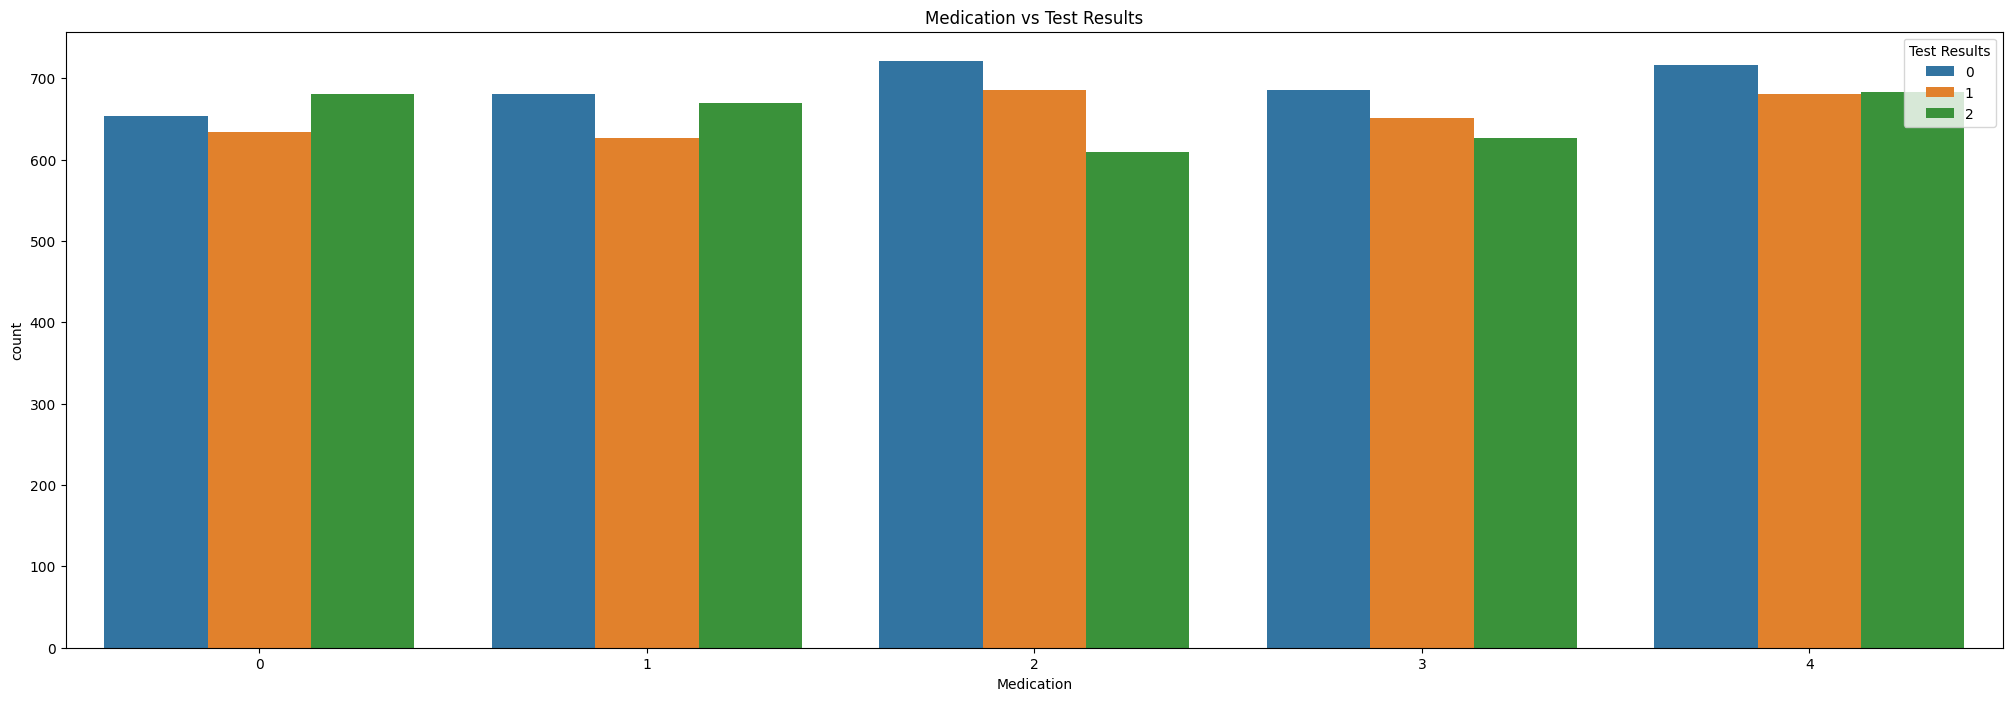

In [ ]:
# Loại bỏ các hàng có giá trị thiếu
df.dropna(inplace=True)

# Chọn các cột có liên quan và biến cố mục tiêu
selected_columns = ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
              'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
              'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication','Test Results']
data_for_plot = df[selected_columns]

# Chuyển đổi dữ liệu văn bản thành dữ liệu số bằng LabelEncoder
le = LabelEncoder()
for column in data_for_plot.select_dtypes(include=['object']).columns:
    data_for_plot[column] = le.fit_transform(data_for_plot[column])

# Trực quan hóa mỗi thuộc tính so với 'Test Results' bằng countplot
for column in data_for_plot.columns[:-1]:  # Loại bỏ 'Test Results'
    plt.figure(figsize=(25, 8))
    sns.countplot(x=column, hue='Test Results', data=data_for_plot)
    plt.title(f'{column} vs Test Results')
    plt.show()


In [ ]:
# Loại bỏ các hàng có giá trị thiếu
df.dropna(inplace=True)

# Chọn các cột số có liên quan để thực hiện phân cụm (loại bỏ 'Test Results')
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[numeric_columns != 'Test Results']
X = df[numeric_columns]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng thuật toán phân cụm K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

# Thêm cột 'Cluster' vào DataFrame
df['Cluster'] = kmeans.labels_

# Trực quan hóa kết quả phân cụm
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [ ]:
# Khám phá dữ liệu trong từng cụm cho từng cột với 'Test Results'
for column in df.columns[:-2]:  # Exclude 'Test Results' and 'Cluster' columns
    plt.figure(figsize=(10, 6))

    # Thống kê cơ bản cho từng cụm
    for cluster_id in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster_id]
        cluster_stats = cluster_data[column].describe()

        print(f"Cluster {cluster_id} Statistics for {column}:")
        print(cluster_stats)
        print("\n")

    # Trực quan hóa cụm cho từng cột với 'Test Results'
    sns.scatterplot(data=df, x='Test Results', y=column, hue='Cluster', palette='viridis')

    # Đặt tên cho trục và tiêu đề
    plt.xlabel('Test Results')
    plt.ylabel(column)
    plt.title(f'Clustered Data for {column} vs Test Results')


    # Hiển thị biểu đồ
    plt.show()